In [1]:
#####################################################################
#####################################################################
# PERFORM A DIRECT SIMULATION WITH  DASSFLOW2D
# LAKE AT REST
#
# Introduction to basic commands of run and visualisation of results
#####################################################################
#####################################################################


#=======================================================#
# Source librairies
#=======================================================#

import dassflow2d as df2d
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#=======================================================#
# copy of case files
#=======================================================#

os.chdir('../../')
dassflow_dir = os.getcwd() # DassFlow directory (you can also impose your absolute path)
os.chdir(dassflow_dir)
print("DassFlow directory is: ", dassflow_dir)

# Define directory where case is run
# (its name 'bin_A' is imposed in  {dassflow_dir}/code/makefile.inc : CASEDIR='bin_A')
run_dir = f"{dassflow_dir}/code/bin_A/"

# Define directory containing case data
case_data_dir = f"{dassflow_dir}/cases/tuto_case/2_qin/bin_A/"

# Clean run directory
os.system(f"rm -r {run_dir}*")

# Copy case data to runing directory
os.system(f"cp -r {case_data_dir}* {run_dir}") # Copy of case files from existing case to bin_A
os.system(f"cp {run_dir}/hydrograph_target.txt {run_dir}/hydrograph.txt") # Copy a "real-like" hydrograph into hydrographt.txt used as inflow

# Move to
os.chdir( f"{dassflow_dir}/code/")
os.system("make cleanres cleanmin") # Clean forward run and minimization results

DassFlow directory is:  /home/pagarambois/Documents/Distant/dassflow2d_git_/dassflow2d
make[1]: Entering directory '/home/pagarambois/Documents/Distant/dassflow2d_git_/dassflow2d/code'
rm -rf ./bin_A/res/*
rm -rf ./bin_A/graph/*
rm -rf ./bin_A/min/*
make[1]: Leaving directory '/home/pagarambois/Documents/Distant/dassflow2d_git_/dassflow2d/code'


0

In [2]:
#=======================================================#
# initialization
#=======================================================#

# Creation of dassflowmodel object using case data:
my_model = df2d.dassflowmodel(bin_dir =  f"{dassflow_dir}/code/bin_A", hdf5_path = f"{dassflow_dir}/code/bin_A/res/simu.hdf5" , run_type = "direct", clean = True)
# Initializion of the Fortran kernel (dassflow Python library is obtained by wrapping Fortran source code)
#initialise all fortran kernel values and source them into dassflowmodel object
my_model.init_all()
my_model.kernel.dof.h[:] = my_model.kernel.dof0.h[:]=1

clean= True
call dassflow2d.wrapping.m_mesh.msh()
call         dassflow2d.wrapping.call_model.init_solver(self.kernel)
call   Meshing(mesh_fortran = self.kernel.mesh)

*  Mesh Loading                                                                *
  mesh%file_namechannel.geo                                                                                                                     
 INTO calc_cells_connectivity
 STEP 1 DONE
 OUT calc_cells_connectivity
 INLET            9           1
 OUTLET           9           1
*  Mesh Loading is OK                                                          *
 Read_Dass_Mesh OK --> go out
  call Read_Dass_Mesh( mesh ) done 
  call Mesh_Partition_Scotch( mesh ) 
  call Mesh_Geometric_Properties( mesh ) 
  done mesh input 
 call Machine_Number_Limits
 DONE Machine_Number_Limits

********************************************************************************
 range     =             307
 precision =              15
 zerom     =   1.0730891E-16

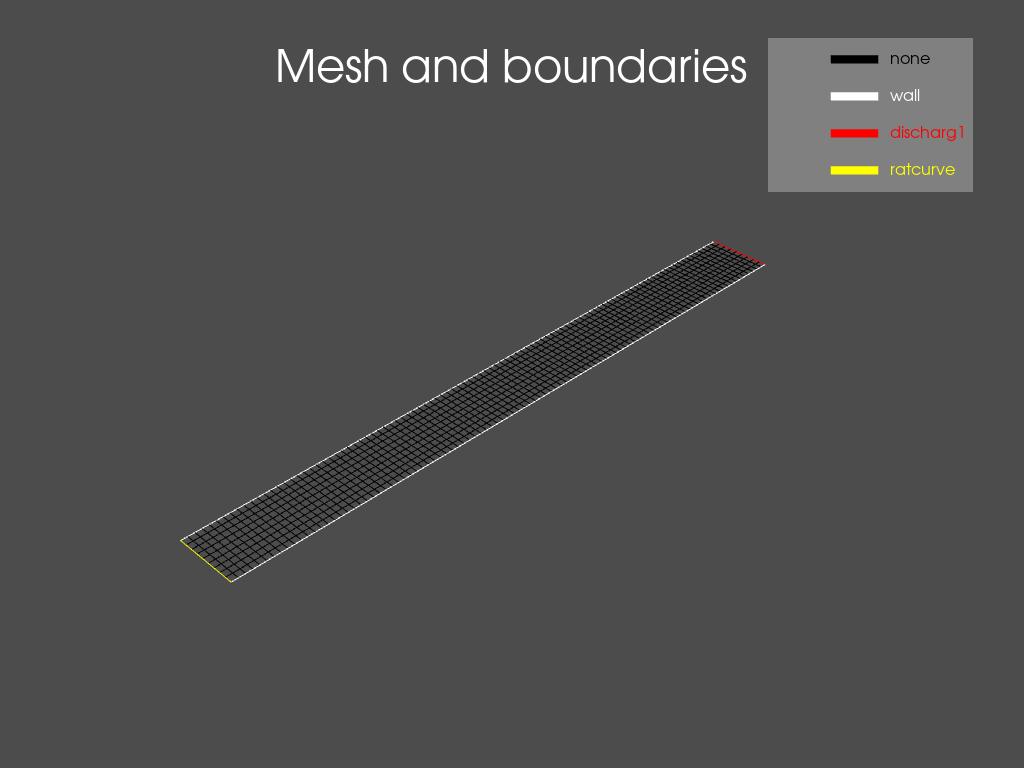

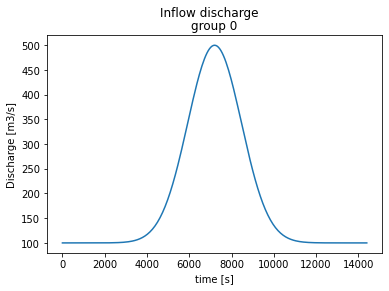

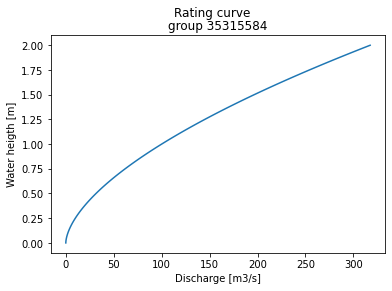

In [3]:
# Plot the mesh and BCs
plotter = my_model.boundary.plot(what="meshing", notebook=True) # for a local run remove notebook option or set notebook=False
plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

plotter = my_model.boundary.plot(what="values", notebook=True) # for a local run remove notebook option or set notebook=False

In [4]:
#=======================================================#
# Run Fortran kernel
#=======================================================#

my_model.run()


*  Running Shallow-Water Model in direct mode                                  *
*  Writing Result File                                                         *
nt =      149 t =  1.44103E+02 /  1.44000E+04 (   1.0 % ) , dt =  9.815178E-01
nt =      296 t =  2.88233E+02 /  1.44000E+04 (   2.0 % ) , dt =  9.803240E-01
nt =      443 t =  4.32597E+02 /  1.44000E+04 (   3.0 % ) , dt =  9.836336E-01
nt =      589 t =  5.76388E+02 /  1.44000E+04 (   4.0 % ) , dt =  9.859368E-01
nt =      735 t =  7.20451E+02 /  1.44000E+04 (   5.0 % ) , dt =  9.873989E-01
nt =      881 t =  8.64682E+02 /  1.44000E+04 (   6.0 % ) , dt =  9.882774E-01
nt =     1026 t =  1.00802E+03 /  1.44000E+04 (   7.0 % ) , dt =  9.887837E-01
nt =     1172 t =  1.15241E+03 /  1.44000E+04 (   8.0 % ) , dt =  9.890718E-01
nt =     1318 t =  1.29683E+03 /  1.44000E+04 (   9.0 % ) , dt =  9.892302E-01
nt =     1463 t =  1.44027E+03 /  1.44000E+04 (  10.0 % ) , dt =  9.893134E-01
nt =     1609 t =  1.58471E+03 /  1.44000E+04 (

In [5]:
#=======================================================#
# Vizualize parameters and results
#=======================================================#

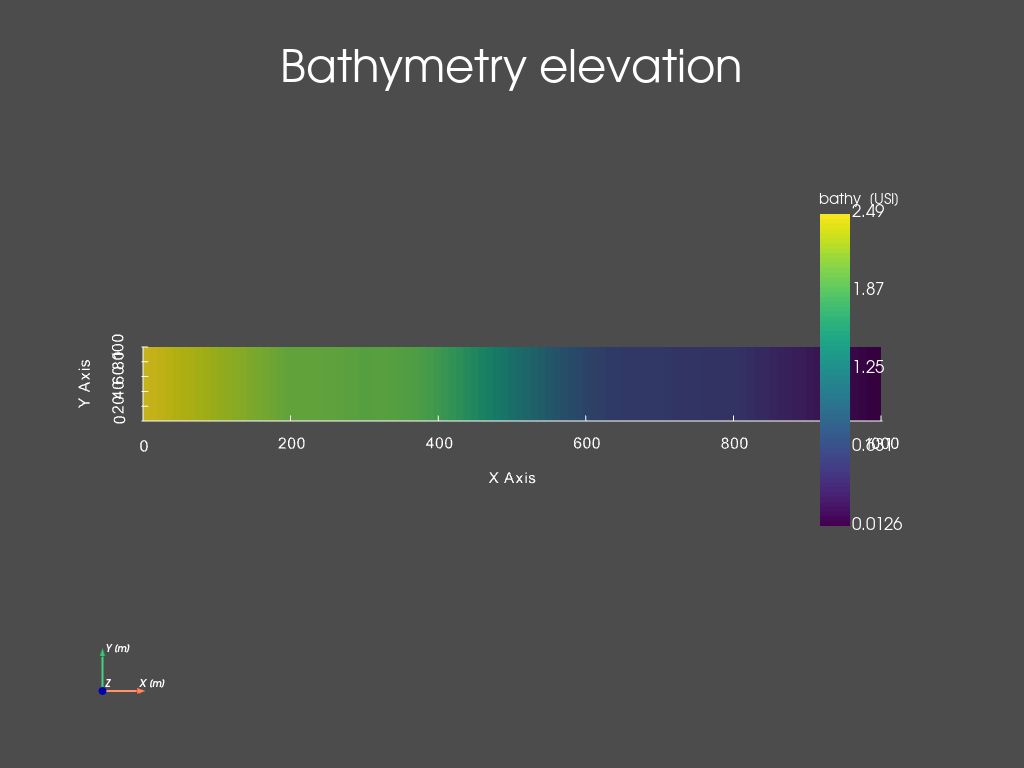

In [6]:
# Plot of the 2D bathymetry (input parameter of the 2D shallow water model)

#Plot bathymetry field
plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "bathy",
                                             title_plot = "Bathymetry elevation",
                                             notebook = True )# for a local run remove notebook option or set notebook=True

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

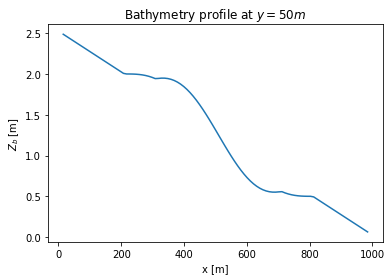

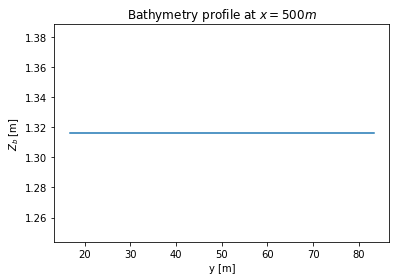

In [7]:
# Plot a bathymetry longitudinal profile (at y=50m)
allx =[]
allz = []
for i in range(my_model.meshing.mesh_fortran.nc):
        x =my_model.meshing.mesh_fortran.cell[i].grav.x
        y = my_model.meshing.mesh_fortran.cell[i].grav.y
        if(y==50.0):
            allx.append(x)
            allz.append(my_model.outputs.result.bathy[i-1])

plt.plot(allx[1:-1],allz[1:-1])
plt.xlabel("x [m]")
plt.ylabel("$Z_b$ [m]")
plt.title("Bathymetry profile at $y = 50m$")
plt.show()

# Plot a bathymetry lateral profile (at x=50m)
ally =[]
allz = []
for i in range(my_model.meshing.mesh_fortran.nc):
        x =my_model.meshing.mesh_fortran.cell[i].grav.x
        y = my_model.meshing.mesh_fortran.cell[i].grav.y
        if(x==500.0):
            ally.append(y)
            allz.append(my_model.outputs.result.bathy[i-1])

plt.plot(ally[1:-1],allz[1:-1])
plt.xlabel("y [m]")
plt.ylabel("$Z_b$ [m]")
plt.title("Bathymetry profile at $x = 500m$")
plt.show()

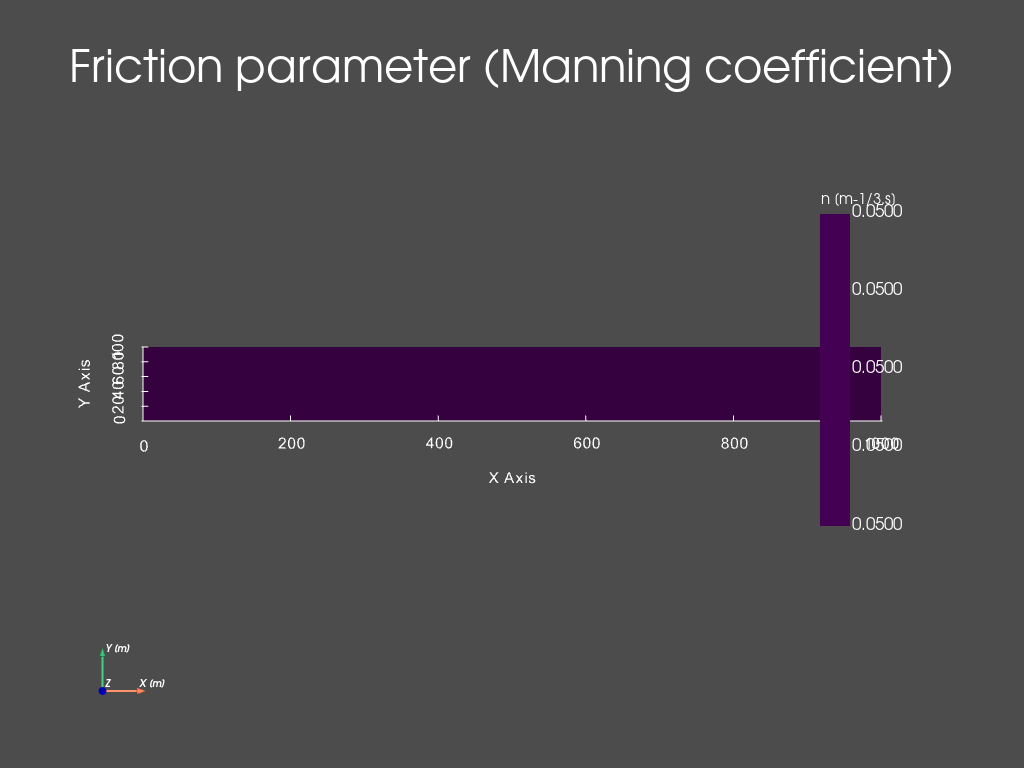

In [8]:
# Plot the friction parameter field

plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "manning_alpha",
                                             title_scale_bar ="n [m-1/3.s] ",
                                             title_plot = "Friction parameter (Manning coefficient)",
                                             notebook = True )# for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # if used in Jupyter notebook, with notebook = True above

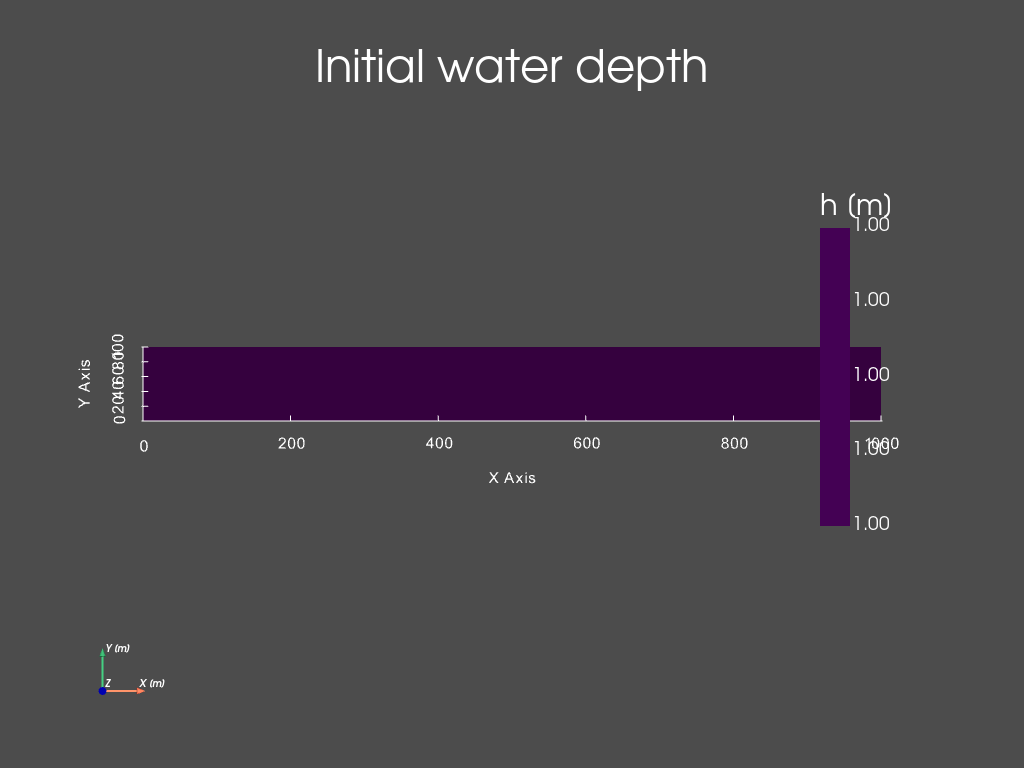

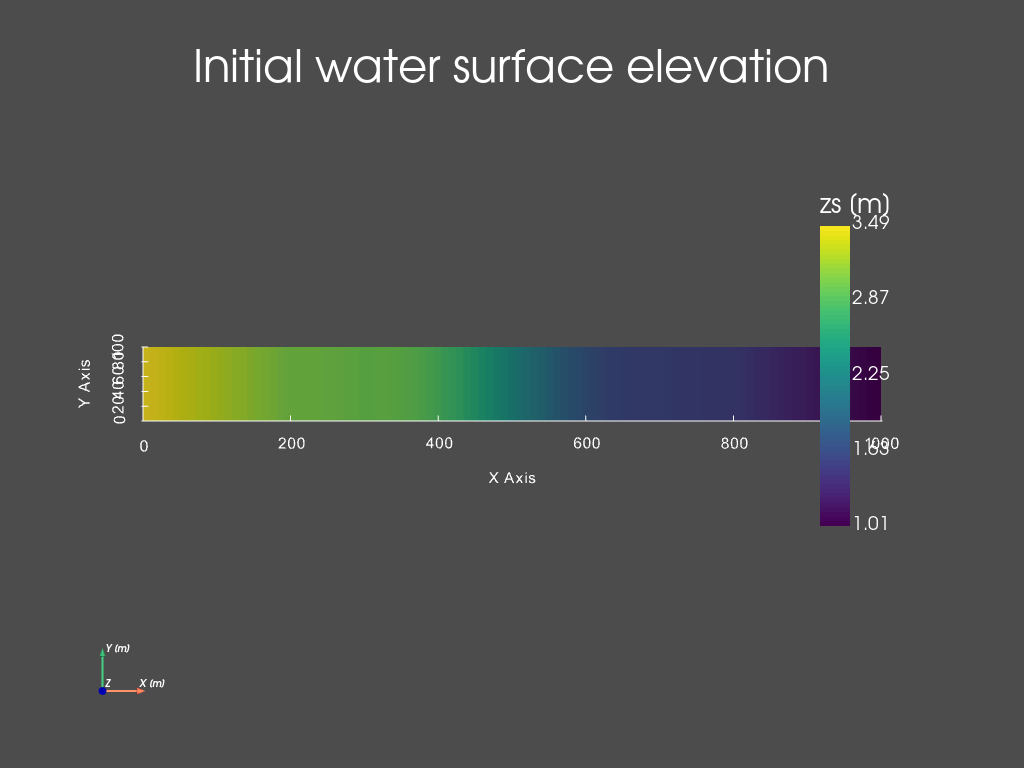

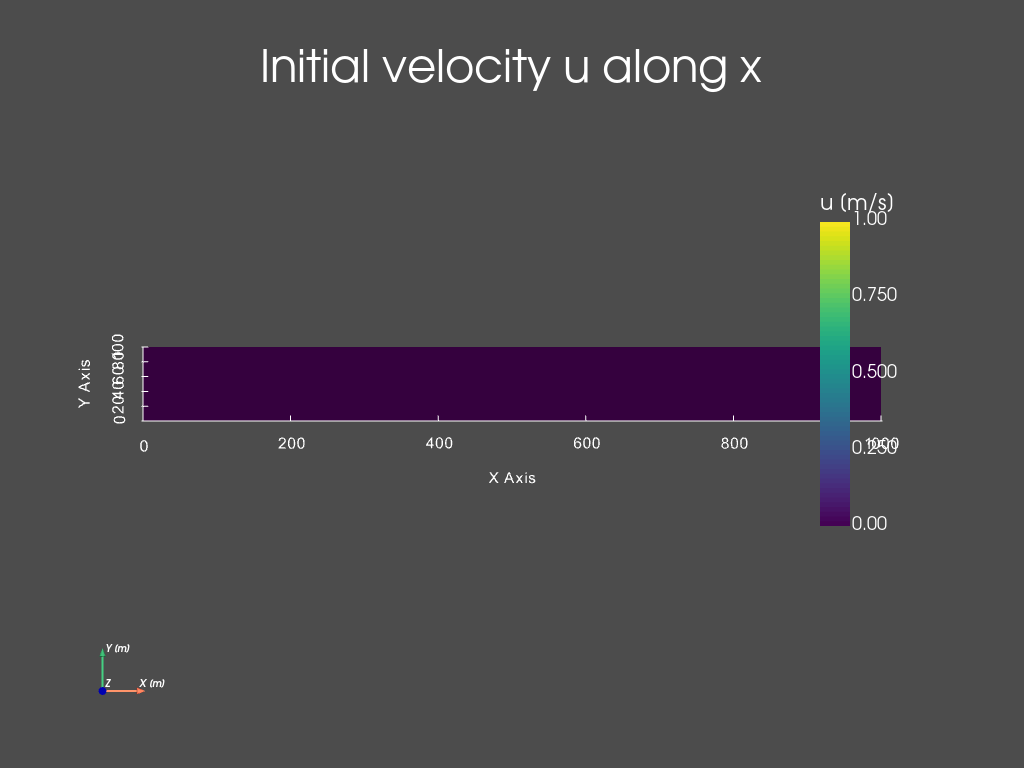

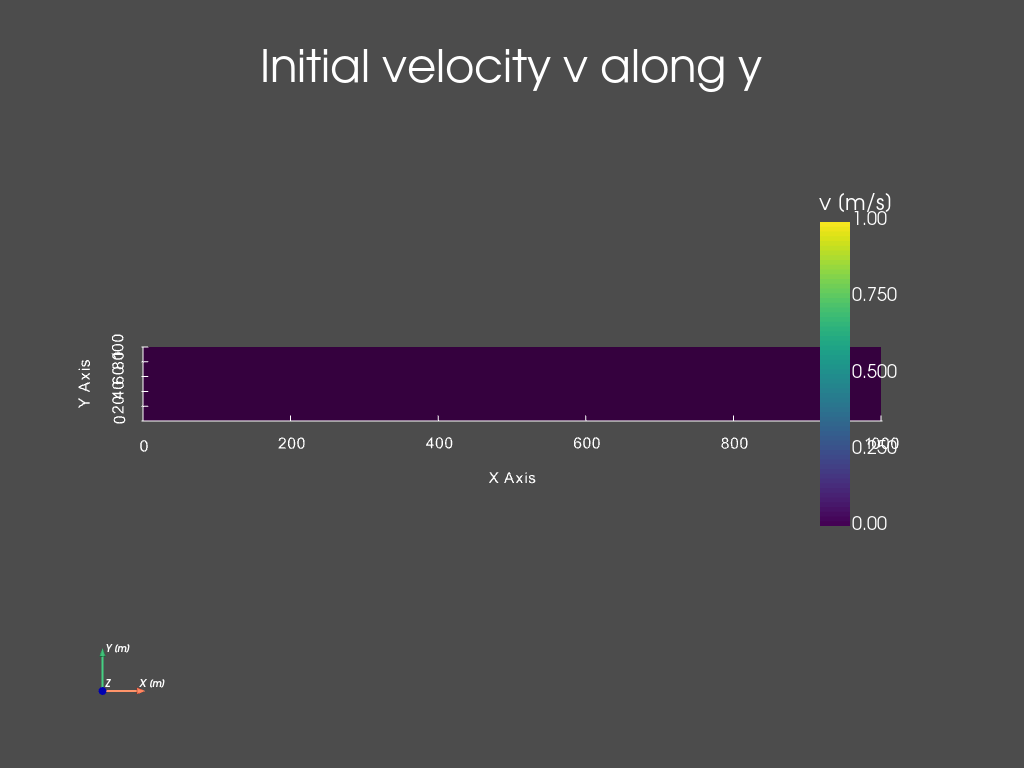

In [9]:
# Plot intial flow conditions

plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "h",
                                             when = 0,
                                             title_scale_bar ="h [m] ",
                                             title_plot = "Initial water depth",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "zs",
                                             when = 0,
                                             title_scale_bar ="zs [m] ",
                                             title_plot = "Initial water surface elevation",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "u",
                                             when = 0,
                                             title_scale_bar ="u [m/s] ",
                                             title_plot = "Initial velocity u along x",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed


plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "v",
                                             when = 0,
                                             title_scale_bar ="v [m/s] ",
                                             title_plot = "Initial velocity v along y",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

In [10]:
# Compute velocity magnitude
u = my_model.outputs.result.u
v = my_model.outputs.result.v
norm_vel = np.sqrt(u**2+v**2)

#compute local Froude number at each mesh cell center
h = my_model.outputs.result.h
g = my_model.config["g"]
Froude = norm_vel / np.sqrt(g*h)

# Print the shape of the output velocity fields
print("The shape of the output velocity array is : \n", np.shape(norm_vel))
print("The first number corresponds to the number of cells, \n n_cells = ", np.shape(norm_vel)[0])
print("The second number corresponds to the number output time steps \n nt_out = ", np.shape(norm_vel)[1])

print("Maximum lateral velocity v [m/s] in space at each output time step is: \n v_max_x = ", np.amax(v,axis=0))

The shape of the output velocity array is : 
 (891, 5)
The first number corresponds to the number of cells, 
 n_cells =  891
The second number corresponds to the number output time steps 
 nt_out =  5
Maximum lateral velocity v [m/s] in space at each output time step is: 
 v_max_x =  [0.00000000e+00 7.78724964e-16 1.03608467e-15 5.90766910e-16
 5.61617894e-16]


In [11]:
#Check the maximum Froude number
print("Maximum Froude number in space at each output time step is: \n Fr_max_x =", np.amax(Froude,axis=0))

Maximum Froude number in space at each output time step is: 
 Fr_max_x = [0.         0.44915849 0.46383183 0.44286978 0.44678422]


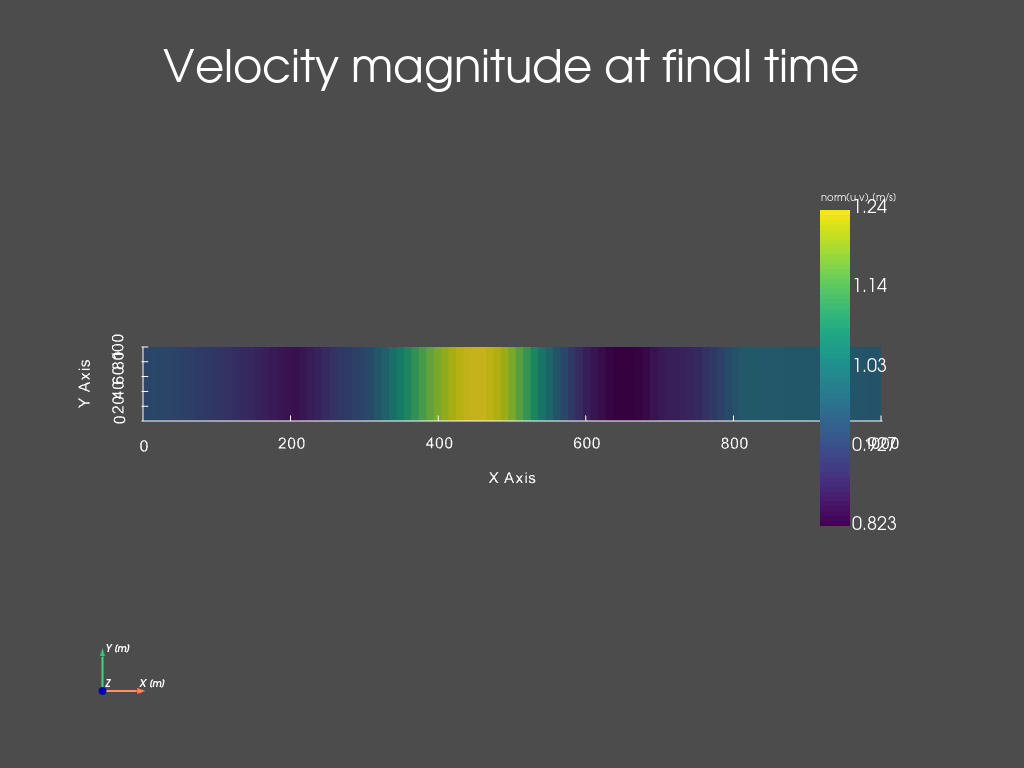

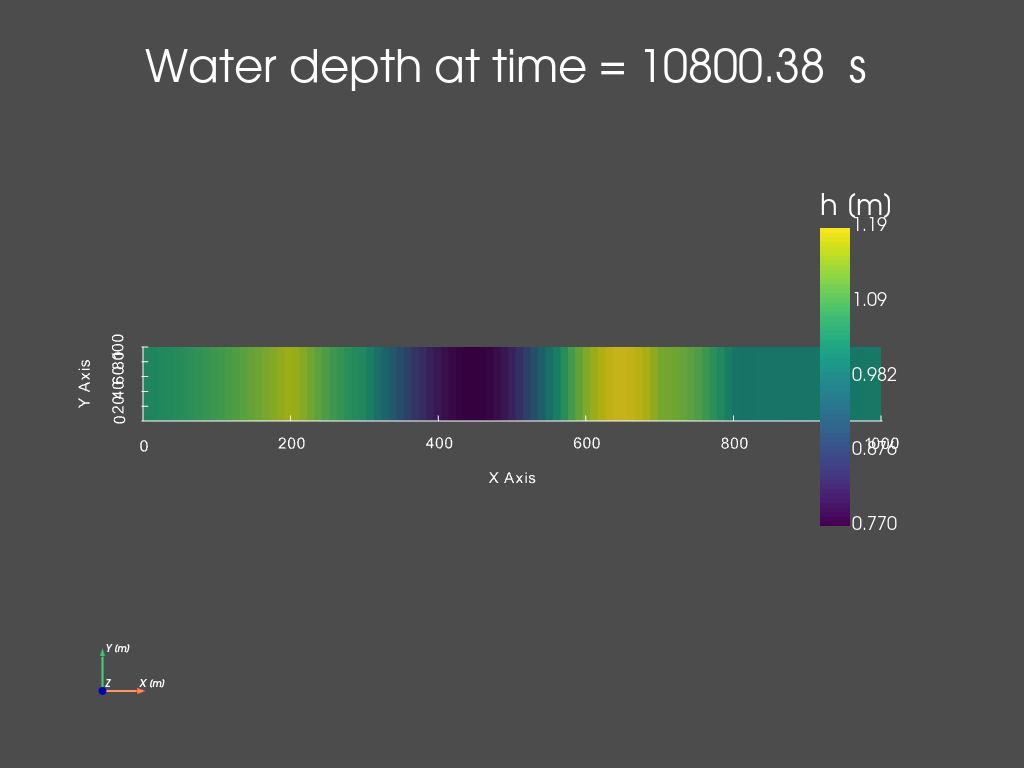

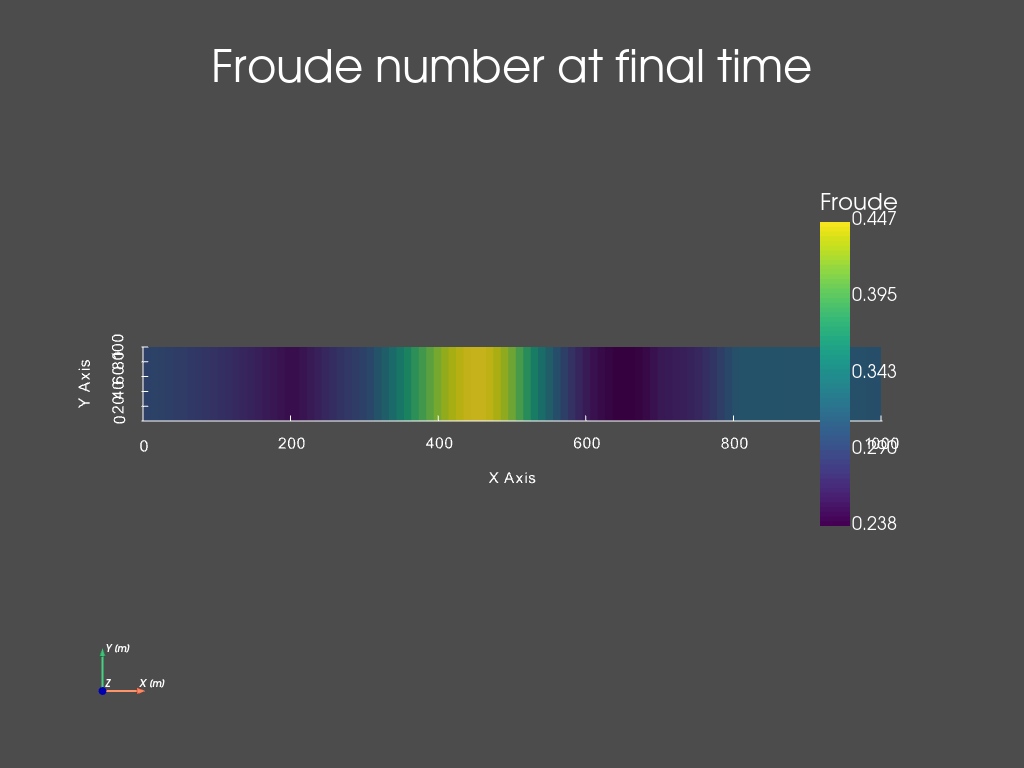

In [12]:
# Plot velocity magnitude at final time step
plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             my_scalar = norm_vel[:,-1],
                                             title_scale_bar ="norm(u,v) [m/s] ",
                                             title_plot = f"Velocity magnitude at final time",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # if used in Jupyter notebook, with notebook = True above

# Plot flow state at a given time
plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "h",
                                             when = -1,
                                             title_scale_bar ="h [m] ",
                                             title_plot = f"Water depth at time = {my_model.outputs.result.all_time[3]}  s "  ,
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # if used in Jupyter notebook, with notebook = True above

# Plot Froude number at final time step
plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             my_scalar = Froude[:,-1],
                                             title_scale_bar ="Froude",
                                             title_plot = f"Froude number at final time",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # if used in Jupyter notebook, with notebook = True above